Este colab fue desarrollado por Arnold Charry Armero

# Star Oil Company

Star Oil Company está considerando cinco oportunidades de inversión diferentes. Los flujos de salida de efectivo y los valores actuales netos (en millones de dólares) se dan en la Tabla 7. Star Oil tiene $\$ 40$
millones disponibles para inversión ahora (tiempo 0); se estima que dentro de un año (tiempo
1) Habrá 20 millones de dólares disponibles para inversión. Star Oil puede comprar cualquier fracción de cada
inversión. En este caso, las salidas de efectivo y el VAN se ajustan en consecuencia. Por ejemplo, si Star Oil compra una quinta parte de la inversión 3, entonces se producirá una salida de efectivo de
1/5
(5) Se requeriría $\$1$ millón en el momento 0, y una salida de efectivo de
1/5 (5) Se necesitaría $\$1$ millón en el momento 1. La quinta parte de la inversión 3 produciría un VPN de 1/5
(16) = $3.2
millón. Star Oil quiere maximizar el VPN que se puede obtener invirtiendo en las inversiones 1 a 5. Formule un LP que ayude a lograr este objetivo. Supongamos que quedan fondos
terminado en el momento 0 no se puede utilizar en el momento 1.

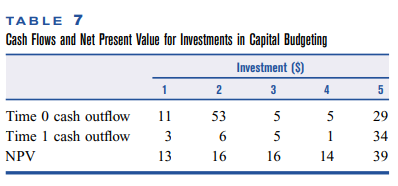

# Conjuntos

$ i = \text{Inversión indexado por } i$

## Parámetros

$ VPN_{i} = \textrm{VPN generado por el proyecto } i $

$ CO_{ij} = \textrm{Salida de caja en el proyecto } i  \textrm{ en el momento } j $

$ F_{j} = \textrm{Presupuesto en el momento } j $

## Variables de decisión

$ x_{i} = \textrm{fracción de inversión comprada i}$

## Función objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} VPN_{i}\: x_{i} $$

## Restricciones

No se puede rebasar el presupuesto para las inversiones,

$$ \sum_{i = 1}^{n}x_{i}\: CO_{ij} \leq  F{j}, \forall j$$

Todas las variables son fracciones o completas,

$$ x_{i} \leq 1, \forall i$$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 10.3 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [4]:
inversión = range(5)
momento = range(2)

In [5]:
#Parámetros
VPN = [13, 16, 16, 14, 39]

CO = [[11, 53, 5, 5, 29], [3, 6, 5, 1, 34]]

F = [40, 20]

In [15]:
# Crear la instancia del modelo
model = LpProblem(name="Star_Oil_Company", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (inversión), 0, None, LpContinuous)

# Agregar la función objetivo
model += lpSum([X[i] * VPN[i] for i in inversión])

# Agregar las restricciones

#Se debe satisfacer la demanda
for j in momento:
  model += lpSum(CO[j][i] * X[i] for i in inversión) <= F[j]

for i in inversión:
  model += X[i] <= 1

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0 = 1.0
X_1 = 0.20085995
X_2 = 1.0
X_3 = 1.0
X_4 = 0.28808354
Utilidades totales = $ 57.44901726
